In [96]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [27]:
df = pd.read_csv(r'C:\\Users\\as77475\\Coding\\vgsales.csv')
df.head()



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [28]:
data = df.rename(columns={'Global_Sales': 'Total_Sales'})
data.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [31]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [32]:
data = data.dropna(subset=['Year'])
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [39]:
null_data = data.isnull().sum()
print(null_data)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Total_Sales     0
dtype: int64


In [40]:
data.dropna(inplace=True)
data_check = data.isnull().sum()
print(data_check)

Rank           0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64


In [45]:
data.groupby(['Name','Platform','Genre']).agg({'Total_Sales':'sum'}).sort_values(by='Total_Sales', ascending=False).head(5)

,,,Total_Sales
Name,Platform,Genre,
Wii Sports,Wii,Sports,82.74
Super Mario Bros.,NES,Platform,40.24
Mario Kart Wii,Wii,Racing,35.82
Wii Sports Resort,Wii,Sports,33.00
Pokemon Red/Pokemon Blue,GB,Role-Playing,31.37


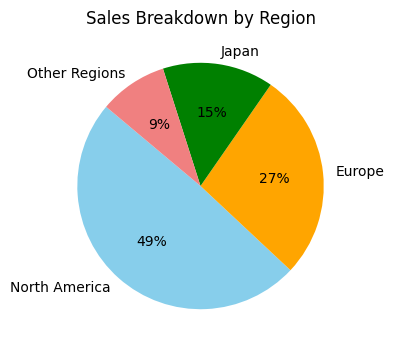

In [46]:
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_data = data[sales_columns].sum()
labels = ['North America', 'Europe', 'Japan', 'Other Regions']

sizes = sales_data.values


plt.figure(figsize=(4, 4))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.0f%%', 
    startangle=140, 
    colors=['skyblue', 'orange', 'green', 'lightcoral']
)
plt.title('Sales Breakdown by Region')
plt.show()

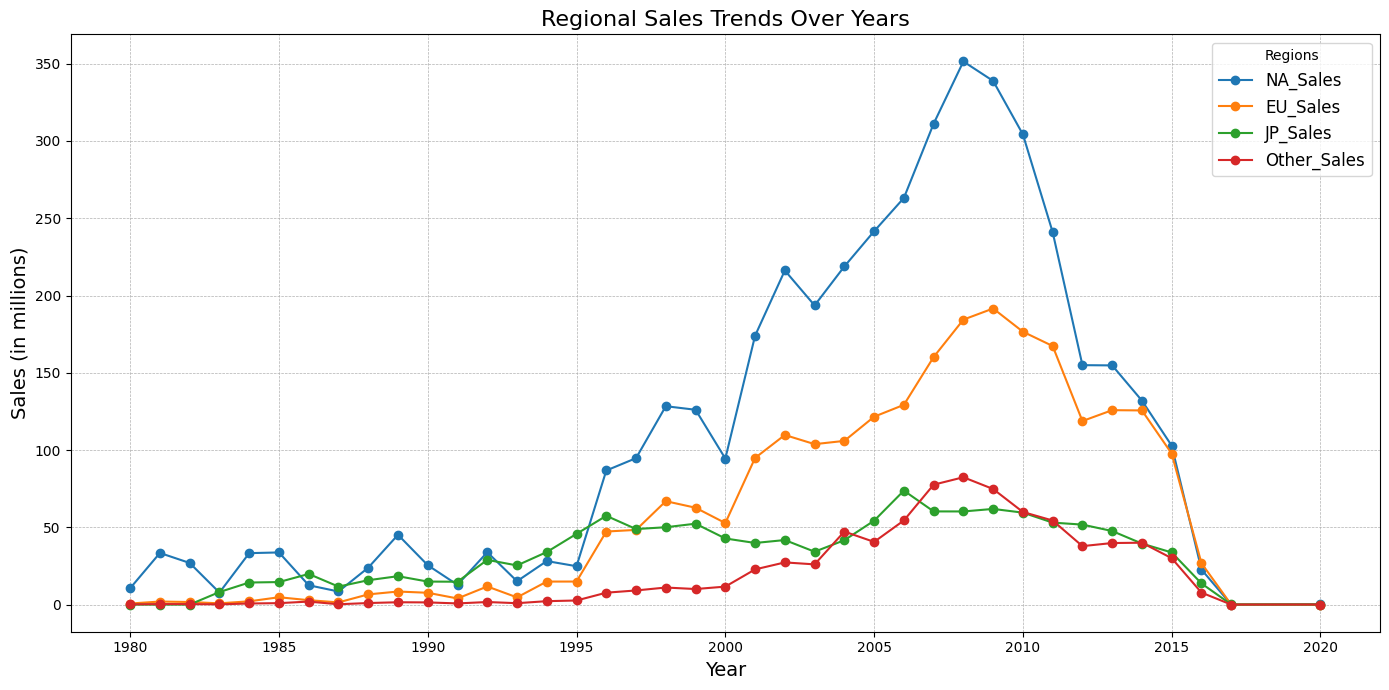

In [47]:
regional_sales = data.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plot the trends for each region
plt.figure(figsize=(14, 7))
for region in regional_sales.columns:
    plt.plot(regional_sales.index, regional_sales[region], marker='o', linestyle='-', label=region)

# Adding plot details
plt.title('Regional Sales Trends Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales (in millions)', fontsize=14)
plt.legend(title="Regions", fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

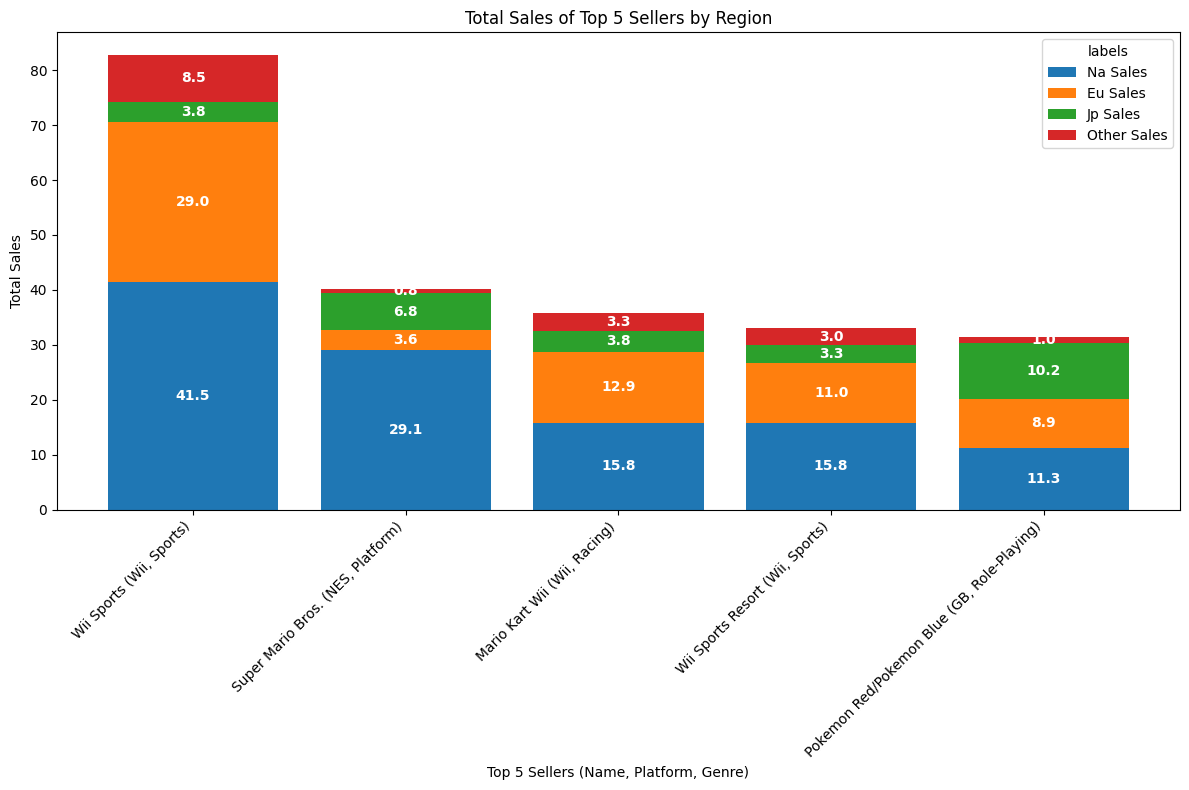

In [48]:

top_sellers = (
    data.groupby(['Name', 'Platform', 'Genre'])
    .agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum', 'Total_Sales': 'sum'})
    .sort_values(by='Total_Sales', ascending=False)
    .head(5)
)

# Reset index for easier access to 'Name' and sales columns
top_sellers = top_sellers.reset_index()

# Extract regional sales and seller names
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_data = top_sellers[regions]
seller_labels = top_sellers.apply(lambda row: f"{row['Name']} ({row['Platform']}, {row['Genre']})", axis=1)

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))



# Create the bars for each region
bottoms = None
for idx, region in enumerate(regions):
    plt.bar(
        seller_labels,
        region_data[region],
        bottom=bottoms,
        label=region.replace('_', ' ').title(),
    )
    if bottoms is None:
        bottoms = region_data[region]
    else:
        bottoms += region_data[region]

    # Add region subtotals to each bar
    for i, total in enumerate(region_data[region]):
        y_position = bottoms[i] - total / 2  # Position in the middle of the segment
        plt.text(
            i,  # X position
            y_position,  # Y position
            f"{total:.1f}",  # Text value (1 decimal place)
            ha='center',  # Centered horizontally
            va='center',  # Centered vertically
            color='white',  # Text color
            fontsize=10,  # Text size
            fontweight='bold',  # Bold text
        )

# Add labels, legend, and title
plt.xlabel('Top 5 Sellers (Name, Platform, Genre)')
plt.ylabel('Total Sales')
plt.title('Total Sales of Top 5 Sellers by Region')
plt.legend(title='labels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [52]:
data.shape

(16291, 11)

In [53]:
#Decision tree model packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [59]:
#Declaring data for decision tree model 
# Step 1: Sales and categorical data; Target: Gaming Platform Name
features = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre', 'Platform']]
target = data['Platform']

# Encode categorical features and the target variable
label_encoders = {}
for col in ['Genre', 'Platform']:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col].astype(str))
    label_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
target = target_encoder.fit_transform(target)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

# Step 3: Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=1000, random_state=42)
dt_classifier.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

C:\Users\as77475\AppData\Local\Temp\ipykernel_9112\1881456622.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = le.fit_transform(features[col].astype(str))
C:\Users\as77475\AppData\Local\Temp\ipykernel_9112\1881456622.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = le.fit_transform(features[col].astype(str))


0.9226756673826327

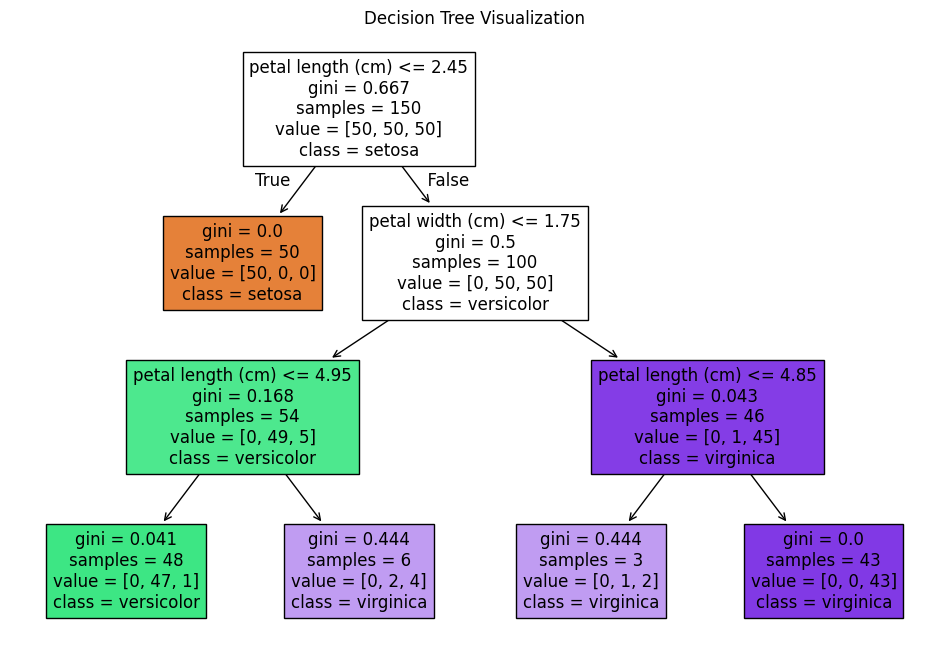

In [61]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load sample data (replace with your own features and target)
data = load_iris()
X, y = data.data, data.target

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.savefig("decision_tree_visualization.png")
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [72]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
clf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [73]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8432034366370053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        93
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00       425
           5       0.00      0.00      0.00        17
           6       0.94      0.85      0.90       156
           7       0.82      0.76      0.79       124
           8       0.00      0.00      0.00         4
          10       0.79      0.19      0.30        59
          11       1.00      0.10      0.18        20
          12       0.00      0.00      0.00         1
          13       0.92      0.88      0.90       190
          15       0.71      0.97      0.82       232
          16       0.91      1.00      0.95       431
          17       0.90      0.96      0.93       276
          18       0.93      0.24      0.38        58
          19       0.63      0.83      0.71       24

C:\Users\as77475\.cisco\python\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\as77475\.cisco\python\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\as77475\.cisco\python\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


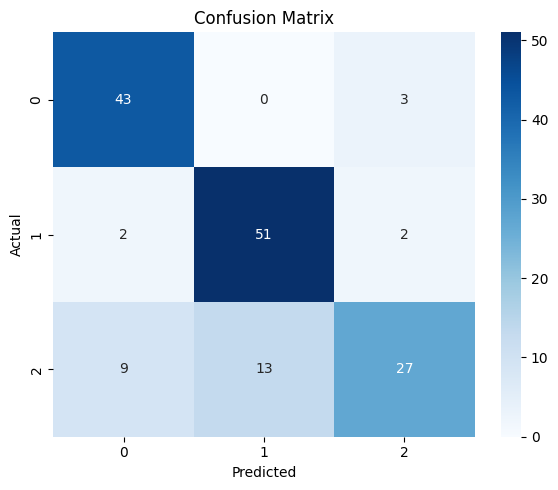

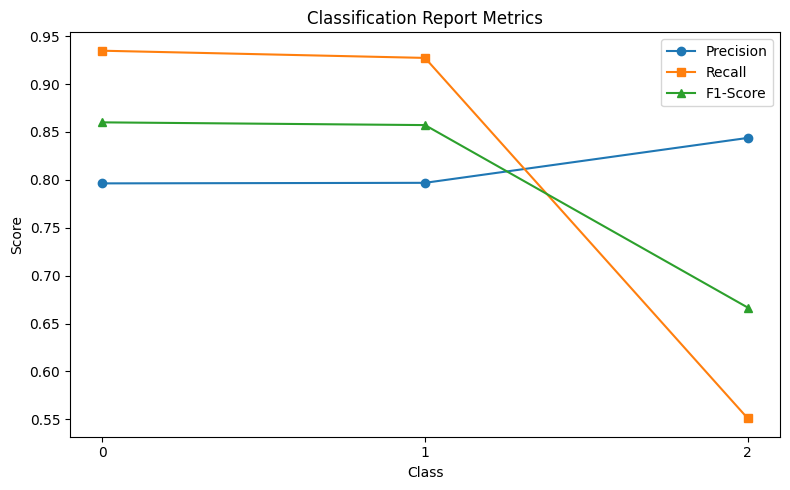

Accuracy: 0.81
Classification Report:
Class 0: Precision=0.80, Recall=0.93, F1-Score=0.86
Class 1: Precision=0.80, Recall=0.93, F1-Score=0.86
Class 2: Precision=0.84, Recall=0.55, F1-Score=0.67


In [101]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Simulate a classification dataset
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, n_redundant=2,
                           n_classes=3, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Plot classification report metrics
labels = list(report.keys())[:-3]  # exclude accuracy, macro avg, weighted avg
precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]

x = range(len(labels))
plt.figure(figsize=(8, 5))
plt.plot(x, precision, label='Precision', marker='o')
plt.plot(x, recall, label='Recall', marker='s')
plt.plot(x, f1_score, label='F1-Score', marker='^')
plt.xticks(x, labels)
plt.title('Classification Report Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.savefig('classification_metrics.png')
plt.show()


# Print accuracy and classification report summary
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
for label in labels:
    print(f"Class {label}: Precision={report[label]['precision']:.2f}, "
          f"Recall={report[label]['recall']:.2f}, F1-Score={report[label]['f1-score']:.2f}")


